In [5]:
psrname='J1909-3744'

In [6]:
#SPNA chain
EPTA_dir='/media/root1/3PAR/aman/posteriors/EPTA-ONLY/SPNA/'+psrname+'/TM_WN_RN20_DM149/ptmcmc/'

In [7]:
#SPNTA chain
EINPTA_dir='/media/root1/3PAR/aman/posteriors/EPTA-ONLY/SPNTA/'+psrname+'/results/'

In [8]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd

2023-03-24 14:04:43.418093: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 14:04:43.604245: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-24 14:04:43.604276: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-24 14:04:44.276466: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [9]:
#SPNA
epta_1=np.loadtxt(EPTA_dir+'chain_1.txt')
par_epta=pd.read_csv(EPTA_dir+'pars.txt', header = None)
len_epta=len(par_epta)
epta_2=epta_1.T

In [10]:
#SPNTA
einpta_1=np.loadtxt(EINPTA_dir+'TNfinal-'+psrname+'-post_equal_weights.dat')
par_einpta=pd.read_csv(EINPTA_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
len_einpta=len(par_einpta)
einpta_2=einpta_1.T

In [11]:
epta_arr=[epta_2[len(par_epta)-1],epta_2[len(par_epta)-2],epta_2[len(par_epta)-3],epta_2[len(par_epta)-4]]
einpta_arr=[einpta_2[len(par_einpta)-4],einpta_2[len(par_einpta)-3],einpta_2[len(par_einpta)-2],einpta_2[len(par_einpta)-1]]

In [12]:
names = ['rn_logA','rn_gamma','dm_logA','dm_gamma']
labels=['\log A_R','\gamma_R', '\log A_{DM}','\gamma_{DM}']
del_names=['delta_logA','delta_gamma']

In [13]:
epta=MCSamples(samples=np.array(epta_arr).transpose(),loglikes=epta_2[-3],names=names,labels=labels,label='EPTA_SPNA')
einpta=MCSamples(samples=np.array(einpta_arr).transpose(),loglikes=einpta_2[-1],names = names,labels=labels,label='EPTA_SPNTA \n'+psrname)

In [14]:
spna_arr=[epta_2[len_epta-1],epta_2[len_epta-2],epta_2[len_epta-3],epta_2[len_epta-4]]

spnta_arr=[einpta_2[len_einpta-4],einpta_2[len_einpta-3],einpta_2[len_einpta-2],einpta_2[len_einpta-1]]

spna_arr_red=[epta_2[len_epta-1],epta_2[len_epta-2]]

spnta_arr_red=[einpta_2[len_einpta-4],einpta_2[len_einpta-3]]

spna_arr_dm=[epta_2[len_epta-3],epta_2[len_epta-4]]

spnta_arr_dm=[einpta_2[len_einpta-2],einpta_2[len_einpta-1]]

## Tension Considering red+dm

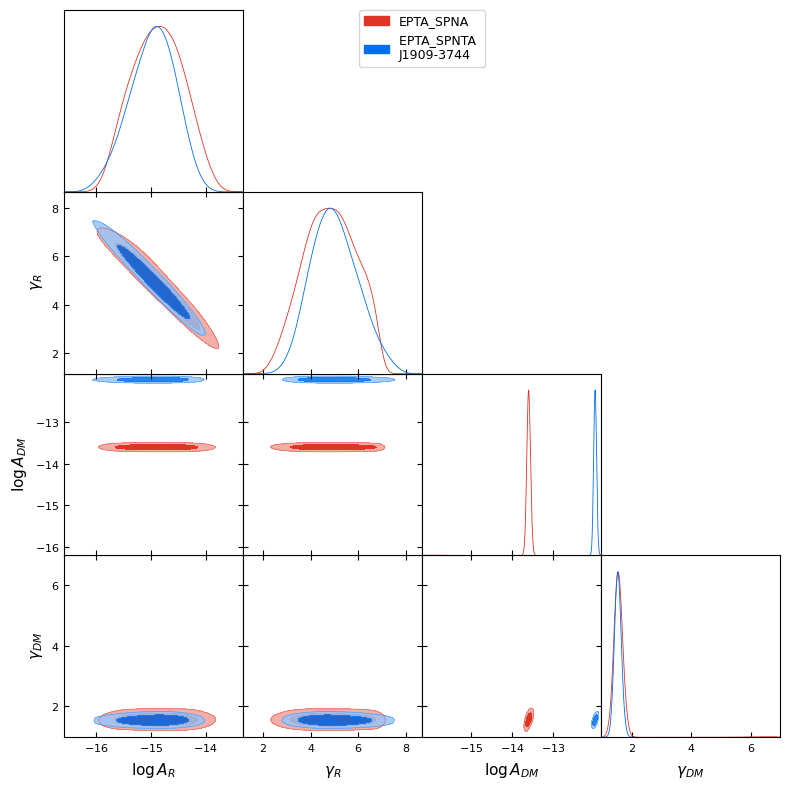

In [15]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([epta,einpta], filled=True)
plt.savefig(psrname+'_RN_DM_SPNA+SPNTA_EPTA.png',dpi=300)
plt.show()

In [16]:
from diff_chain import  Diff_chain_shift


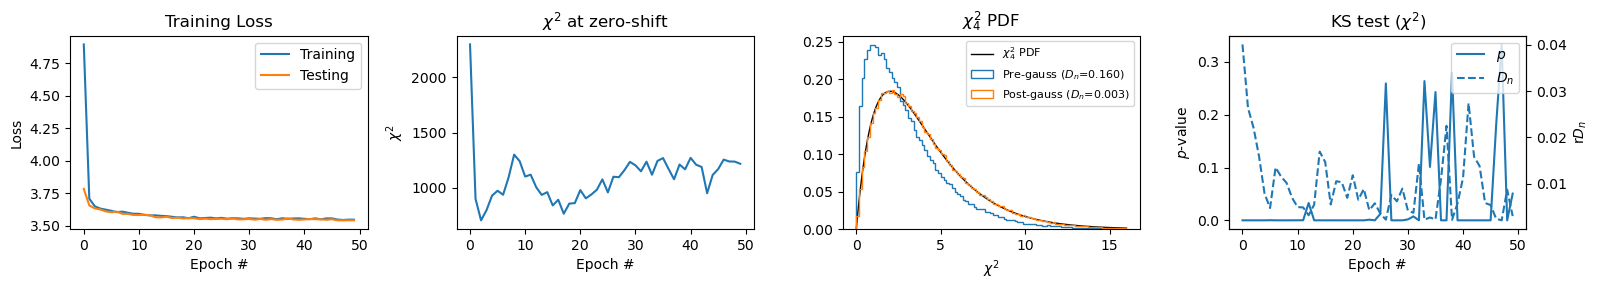

64/64 [==============================] - 5s 78ms/step - loss: 3.5456 - val_loss: 3.5408 - shift0_chi2: 1219.1244 - shift0_pval: 1.0000 - shift0_nsigma: inf - chi2Z_ks: 0.0030 - chi2Z_ks_p: 0.0506 - lr: 1.0000e-03


/media/root1/3PAR/aman/posterior_comparisons/SPNA+SPNTA_runs_EPTA/diff_chain.py:52: UserWarning: Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.
  warnings.warn('Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.')


In [17]:
diff_chain, nsig, chi_2, D_B=Diff_chain_shift(epta,einpta)

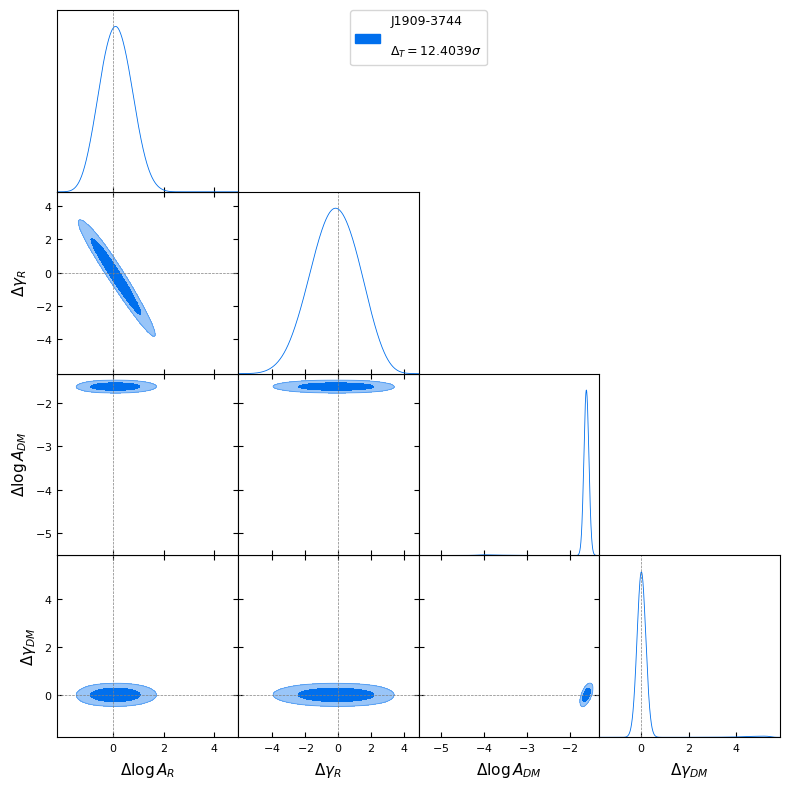

In [18]:
g = plots.get_subplot_plotter()
g.triangle_plot(diff_chain, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff_SPNA+SPNTA_EPTA.png',dpi=300)

## Tension considering red noise Only

In [19]:
names_r = ['rn_logA','rn_gamma']
labels_r=['\log A_R','\gamma_R']

spna_red=MCSamples(samples=np.array(spna_arr_red).transpose(),loglikes=epta_2[-3],names=names_r,labels=labels_r,label='SPNA')
spnta_red=MCSamples(samples=np.array(spnta_arr_red).transpose(),loglikes=einpta_2[-1],names = names_r,labels=labels_r,label='SPNTA \n'+psrname)

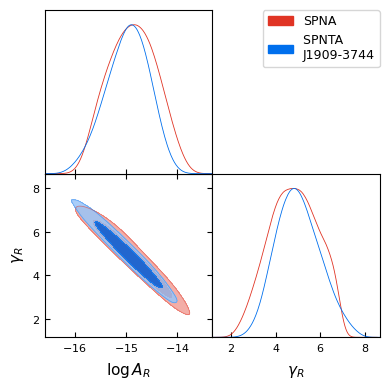

In [20]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna_red,spnta_red], filled=True)
plt.savefig(psrname+'_RN_DM_SPNA+SPNTA_EPTA_red.png',dpi=300)
plt.show()

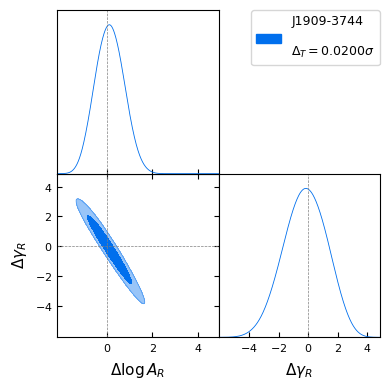

In [21]:
%matplotlib inline
diff_chain_r, shift_probability_r, pl_r, pu_r=Diff_chain_shift(spna_red,spnta_red)
g = plots.get_subplot_plotter()
nsig_r=utilities.from_confidence_to_sigma(shift_probability_r)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_r, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig_r))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff_SPNA+SPNTA_EPTA_red.png',dpi=300)

## Tension considering dm noise only

In [22]:
names_dm = ['dm_logA','dm_gamma']
labels_dm=['\log A_{DM}','\gamma_{DM}']

In [23]:
spna_dm=MCSamples(samples=np.array(spna_arr_dm).transpose(),loglikes=epta_2[-3],names=names_r,labels=labels_r,label='SPNA')
spnta_dm=MCSamples(samples=np.array(spnta_arr_dm).transpose(),loglikes=einpta_2[-1],names = names_r,labels=labels_r,label='SPNTA \n'+psrname)

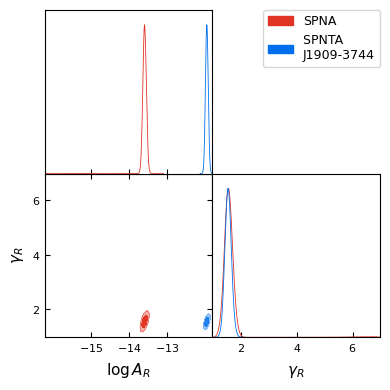

In [24]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna_dm,spnta_dm], filled=True)
plt.savefig(psrname+'_RN_DM_SPNA+SPNTA_EPTA_dm.png',dpi=300)
plt.show()

/media/root1/3PAR/aman/posterior_comparisons/SPNA+SPNTA_runs_EPTA/diff_chain.py:29: UserWarning: Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.
  warnings.warn('Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.')


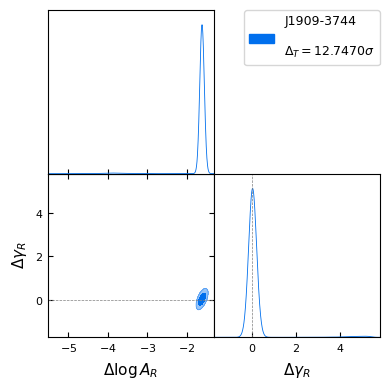

In [25]:
%matplotlib inline
diff_chain_dm, nsig_dm, chi_2_dm, D_B_dm=Diff_chain_shift(spna_dm,spnta_dm)
g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_dm, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig_dm))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colodm_text=True)
plt.savefig(psrname+'_diff_SPNA+SPNTA_EPTA_DM.png',dpi=300)